### Introduction. Variables description and modification

**Research question:** <br>
Can a machine learning classification model reliably distinguish between individuals who agree and disagree with the statement “Women should be protected by men” using a concise set of psychosocial predictors? <br>	

**Target variable** - "wprtbym", women should be protected by men (agree/disagree) <br>
**Number of features** - 21 <br>
**Number of observations** - 40156 <br>

The variables were selected by team from the ESS11 research database [1].

In [ ]:
import pandas as pd
import os 
import numpy as np
import datetime
import missingno as msno


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report
)

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay, 
    roc_curve, 
    auc, 
    precision_recall_curve, 
    RocCurveDisplay, 
    PrecisionRecallDisplay
)



#### Variables description

In [2]:
data = pd.read_csv('ESS11 - ML 2.csv')
print(data.head(5))

  cntry  happy  sclmeet  aesfdrk  health  rlgblg  rlgatnd  dscrgnd  likrisk  \
0    AT      8        4        2       3       1        6        0        2   
1    AT      9        7        3       2       2        7        0        0   
2    AT      9        4        3       1       2        5        1        0   
3    AT      7        6        3       3       1        6        0        0   
4    AT      9        5        1       2       1        7        0        1   

   mascfel  ...  impbemw  wprtbym  gndr  yrbrn  marsts  chldhhe  domicil  \
0        4  ...        3        2     1   1958      66        1        3   
1        3  ...        3        2     2   2002       6        2        1   
2        0  ...        5        4     2   1970      66        6        3   
3        0  ...        5        3     2   1945       4        1        1   
4        0  ...        5        3     1   1959      66        1        4   

   edulvlb  pdwrk  wkhtot  
0      322      0     666  
1      423  

Variables: <br>
**cntry** - Country. Country codes. <br>

**happy** - How happy are you. <br>
[0 - Extremely unhappy, 10 - Extremely happy, 77 - Refusal, 88 - Don't know*, 99 - No answer*, * - Missing value ]<br>

**sclmeet** - How often socially meet with friends, relatives, or colleagues. <br>
[1 - Never, 2 - Less than once a month, 3 - Once a month, 4 - Several times a month, 5 - Once a week, 6 - Several times a week ,7 - Every day, 77 - Refusal*, 88 - Don't know*, 99 - No answer*, * - Missing value] <br>

**aesfdrk** - Feeling of safety walking alone after dark. <br>
[1 - Very safe, 2 - Safe, 3 - Unsafe, 4 - Very unsafe, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**health** - Subjective general health. <br>
[1 - Very good, 2 - Good, 3 - Fair, 4 - Bad, 5 - Very bad, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**rlgblg** - Belongs to a particular religion. <br>
[1 - Yes, 2 - No, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**rlgatnd** - How often attend religious services. <br>
[1 - Every day, 2 - More than once a week, 3 - Once a week, 4 - At least once a month, 5 - Only on special holy days, 6 - Less often, 7 - Never, 77 - Refusal*, 88 - Don't know*, 99 - No answer*, * - Missing value] <br>

**dscrgnd** - Has experienced gender discrimination. On what grounds is your group discriminated against? <br>
[0 - Not marked, 1 - Marked,* - Missing value] <br>

**likrisk** - I like to take risks, to what extent. <br>
[0 - Not at all, 6 - Completely, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value]<br>

**mascfel** - How masculine respondent feels. <br>
[0 - Not at all masculine,  6 - Very masculine, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**femifel** - How feminine respondent feels. <br>
[0 - Not at all feminine,  6 - Very feminine, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**impbemw** - Importance of being a man/woman to the way respondent thinks about themselves. <br>
[0 - Not at all important, 6 - Extremely important, 66 - Not applicable*,  77 - Refusal*, 88 - Don't know*, 99 - No answer*, * - Missing value ]<br>

**gndr** - Gender. Gender code.<br>
[1 - Male, 2 - Female, 9 - No answer*, * - Missing value]<br>

**yrbrn** - Year of birth. <br>
[7777 - Refusal*, 8888 - Don't know*, 9999 - No answer*, * - Missing value ] <br>

**marsts** - Legal marital status. <br>
[1 - Legally married, 2 - In a legally registered civil union, 3 - Legally separated, 4 - Legally divorced/Civil union dissolved, 5 - Widowed/Civil partner died, 6 - None of these (NEVER married or in legally registered civil union), 66 - Not applicable*,  77 - Refusal*, 88 - Don't know*, 99 - No answer*, * - Missing value] <br>

**chldhhe** - Ever had children living in household. <br>
[1 - Yes, 2 - No, 6 - Not applicable*, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**domicil** - Domicile, respondent's description. <br>
[1 - A big city, 2 - Suburbs or outskirts of big city, 3 - Town or small city, 4 - Country village, 5 - Farm or home in countryside, 7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value] <br>

**edulvlb** - Highest level of education. (list of the possible values provided below)<br>

**pdwrk** - Doing last 7 days: paid work. Which of the descriptions on this card applies to what he/she has been doing for the last 7 days? In paid work (or away temporarily) (employee, self-employed, working for your family business) <br>
[0 - Not marked, 1 - Marked,* - Missing value] <br>

**wkhtot** - Total hours normally worked per week in main job overtime include dails. Regardless of your basic or contracted hours, how many hours do/did you normally work a week (in your main job), including any paid or unpaid overtime. <br>
[666 - Not applicable*, 777 - Refusal*, 888 - Don't know*, 999 - No answer*, * - Missing value] <br>

**wprtbym** - Women should be protected by men (binary or Likert). <br>
[1 - Agree strongly, 2 - Agree, 3 - Neither agree nor disagree, 4 - Disagree, 5 - Disagree strongly,7 - Refusal*, 8 - Don't know*, 9 - No answer*, * - Missing value]

**Here is the separate list of the variable 'edulvlb'**<br>
0	Not completed ISCED level 1 <br>
113	ISCED 1, completed primary education<br>
129	Vocational ISCED 2C < 2 years, no access ISCED 3<br>
212	General/pre-vocational ISCED 2A/2B, access ISCED 3 vocational<br>
213	General ISCED 2A, access ISCED 3A general/all 3<br>
221	Vocational ISCED 2C >= 2 years, no access ISCED 3<br>
222	Vocational ISCED 2A/2B, access ISCED 3 vocational<br>
223	Vocational ISCED 2, access ISCED 3 general/all<br>
229	Vocational ISCED 3C < 2 years, no access ISCED 5<br>
311	General ISCED 3 >=2 years, no access ISCED 5<br>
312	General ISCED 3A/3B, access ISCED 5B/lower tier 5A<br>
313	General ISCED 3A, access upper tier ISCED 5A/all 5<br>
321	Vocational ISCED 3C >= 2 years, no access ISCED 5<br>
322	Vocational ISCED 3A, access ISCED 5B/ lower tier 5A<br>
323	Vocational ISCED 3A, access upper tier ISCED 5A/all 5<br>
412	General ISCED 4A/4B, access ISCED 5B/lower tier 5A<br>
413	General ISCED 4A, access upper tier ISCED 5A/all 5<br>
421	ISCED 4 programmes without access ISCED 5<br>
422	Vocational ISCED 4A/4B, access ISCED 5B/lower tier 5A<br>
423	Vocational ISCED 4A, access upper tier ISCED 5A/all 5<br>
510	ISCED 5A short, intermediate/academic/general tertiary below bachelor<br>
520	ISCED 5B short, advanced vocational qualifications<br>
610	ISCED 5A medium, bachelor/equivalent from lower tier tertiary<br>
620	ISCED 5A medium, bachelor/equivalent from upper/single tier tertiary<br>
710	ISCED 5A long, master/equivalent from lower tier tertiary<br>
720	ISCED 5A long, master/equivalent from upper/single tier tertiary<br>
800	ISCED 6, doctoral degree<br>
5555	Other<br>
7777	Refusal*<br>
8888	Don't know*<br>
9999	No answer* * Missing Value<br>

According to the ESS11 2023 Data Protocol, the missing values in the data files are defined in the following way: Not applicable (6, 66, 666 , ect.), Refusals (7, 77, 777, etc.), Don't know (8, 88, 888, etc.), No answer (9, 99, 999, etc.). So, based on the survey data description, we can convert missing values to Nan.  

#### Check missing values

In [3]:
# Replace Refusal, dont know and no answer with Nan values
data_1 = data.copy()
data_1 = data_1.replace( to_replace=[66,77,88,99,666,777,888,999,6666,7777, 8888, 9999], value = np.NaN) 
data_1['chldhhe'] = data_1['chldhhe'].replace( to_replace=[6], value = np.NaN) # becuase for the variable chldhhe 6 means Not applicable, missing value

In [4]:
replace_val = ['aesfdrk', 'health', 'rlgblg', 'likrisk', 'mascfel', 'femifel', 'chldhhe', 'domicil', 'wprtbym']
for i in replace_val: 
    data_1[i] = data_1[i].replace(to_replace=[7,8,9], value = np.NaN)

In [5]:
for col in data_1: 
    print(f'Column name {col}')
    print(data_1[col].unique())
    print('-------------------')

Column name cntry
['AT' 'BE' 'CH' 'CY' 'DE' 'ES' 'FI' 'FR' 'GB' 'GR' 'HR' 'HU' 'IE' 'IS'
 'IT' 'LT' 'NL' 'NO' 'PL' 'PT' 'RS' 'SE' 'SI' 'SK']
-------------------
Column name happy
[ 8.  9.  7.  5. 10.  6.  3.  4.  0.  1.  2. nan]
-------------------
Column name sclmeet
[ 4.  7.  6.  5.  3.  2.  1. nan]
-------------------
Column name aesfdrk
[ 2.  3.  1. nan  4.]
-------------------
Column name health
[ 3.  2.  1.  4.  5. nan]
-------------------
Column name rlgblg
[ 1.  2. nan]
-------------------
Column name rlgatnd
[ 6.  7.  5.  3.  4.  2. nan  1.]
-------------------
Column name dscrgnd
[0 1]
-------------------
Column name likrisk
[ 2.  0.  1.  4.  3.  5.  6. nan]
-------------------
Column name mascfel
[ 4.  3.  0.  6.  2.  5.  1. nan]
-------------------
Column name femifel
[ 0.  6.  5.  4.  3. nan  2.  1.]
-------------------
Column name impbemw
[ 3.  5.  6.  4.  0.  1. nan  2.]
-------------------
Column name wprtbym
[ 2.  4.  3. nan  1.  5.]
-------------------
Column name gnd

In [6]:
# Country
data_1['cntry'] = data_1['cntry'].astype('category')

# Binary-like
bin_cols = ['dscrgnd', 'pdwrk', 'rlgblg', 'chldhhe', 'gndr']
for c in bin_cols:
    data_1[c] = data_1[c].astype('Int64')  

# Ordinal / Likert 
ord_cols = ['happy', 'sclmeet', 'aesfdrk', 'health',
            'rlgatnd', 'likrisk', 'mascfel', 'femifel',
            'impbemw', 'wprtbym', 'marsts', 'domicil', 'edulvlb']  

data_1[ord_cols] = data_1[ord_cols].apply(pd.to_numeric, errors='coerce')

# Continuous numeric
num_cols = ['yrbrn', 'wkhtot']
data_1[num_cols] = data_1[num_cols].apply(pd.to_numeric, errors='coerce')

In [7]:
# Calculate the age of the survey participants
data_1['current_year'] = datetime.datetime.now().year
data_1['age'] = data_1['current_year'] - data_1['yrbrn'] 

data_1 = data_1.drop(columns=['yrbrn', 'current_year'])  

In [8]:
# Replace 5555 'other' value in the edulvlb with 1
data_1['edulvlb'] = data_1['edulvlb'].replace(to_replace=[5555], value = [1]) 

In [9]:
# Restructure the target variable wprtbym
wprtbym = data_1['wprtbym'].copy()

# Map agree to 1, 2 and disagree to 4,5. Make them binary
data_1['wprtbym_bin'] = np.select(
    [
        wprtbym.isin([1, 2]),   
        wprtbym.isin([4, 5]),  
    ],
    [
        1,  # agree
        0,  # disagree
    ],
    default=np.nan  # all others (3, NaN) make NaN
)

# Drop na values for the target variable 
data_model = data_1[~data_1['wprtbym_bin'].isna()].copy()


data_model = data_model.drop(columns=['wprtbym'])  
data_model = data_model.rename(columns={'wprtbym_bin': 'wprtbym'})
# print(data_model.head(10))

In [10]:
print(f'Before dropping NA values for target variable:{len(data_1)}')
print(f'After dropping NA values for target variable:{len(data_model)}')

Before dropping NA values for target variable:40156
After dropping NA values for target variable:27815


The initial data cleaning involved removing all records where the target variable, wprtbym (Women should be protected by men), had a missing value. This step reduced the available observations from 40,156 to 27,815, resulting in the exclusion of approximately 30% of the original data. The significant reduction in sample size may decrease the statistical power of the model, potentially making it more difficult to detect subtle relationships between the features **X** and the target **y**. The most critical consequence is the potential for Selection Bias. If the missingness in the target variable is Missing Not At Random (MNAR)—meaning individuals who refused to answer the question hold systematically different views than those who responded—the remaining sample of 27,815 records will be biased. The final trained model will be based only on the characteristics and responses of "willing participants," which may lead to poor generalization performance when applied to the segment of the population that tends to avoid answering sensitive questions. This high rate of target variable missingness reinforces the need for precise feature imputation and robust cross-validation to assess the model's true generalization performance [2-6].

In [11]:
num_missing = data_model.isna().sum()
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / data_model.shape[0]

pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
marsts,13760,49.469711
chldhhe,9131,32.827611
wkhtot,3820,13.733597
impbemw,787,2.829409
mascfel,296,1.064174
femifel,295,1.060579
aesfdrk,188,0.675894
age,175,0.629157
rlgblg,155,0.557253
rlgatnd,122,0.438612


<Axes: >

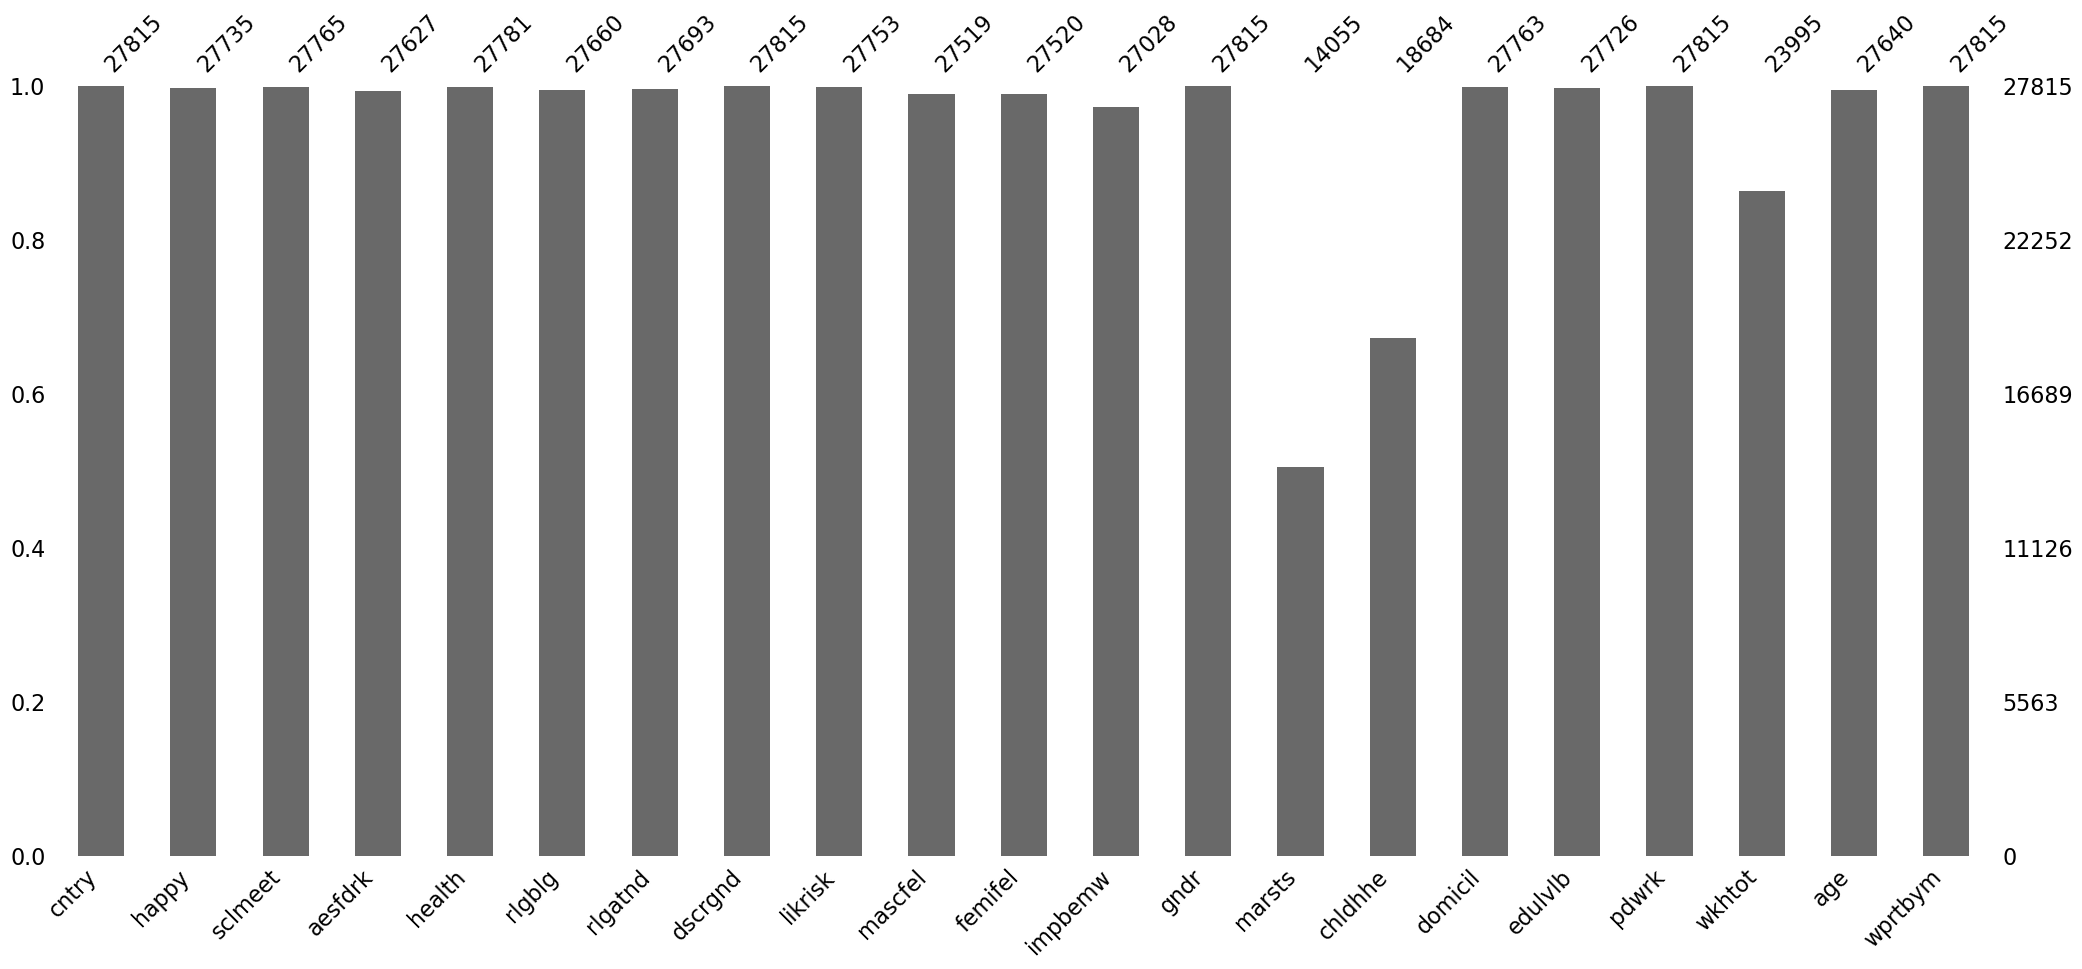

In [12]:
msno.bar(data_model)

We can see that the biggest number of missing values have columns 'marsts', 'chlghhe' and 'wkhtot'. Seems like responders didn't like to answer the question regarding marital status. Interesting observation. It's reasonable strategy to drop this column and don't use further in our models. Next, we can see that column for chldhhe variable has more than 30% of missing values. One third of the participants doesn't want to provide answer for the question regarding children. Second interesting observation. It's also reasonable strategy to drop this column and don't use it further in our models. Regarding the 'wkhtot' variable, total hours normally worked per week in main job, it can be imputed, usign mode or KNN method. Other variables have a little percentage of missing values, so, they also can be imputed using different techniques [5,6]. 

<Axes: >

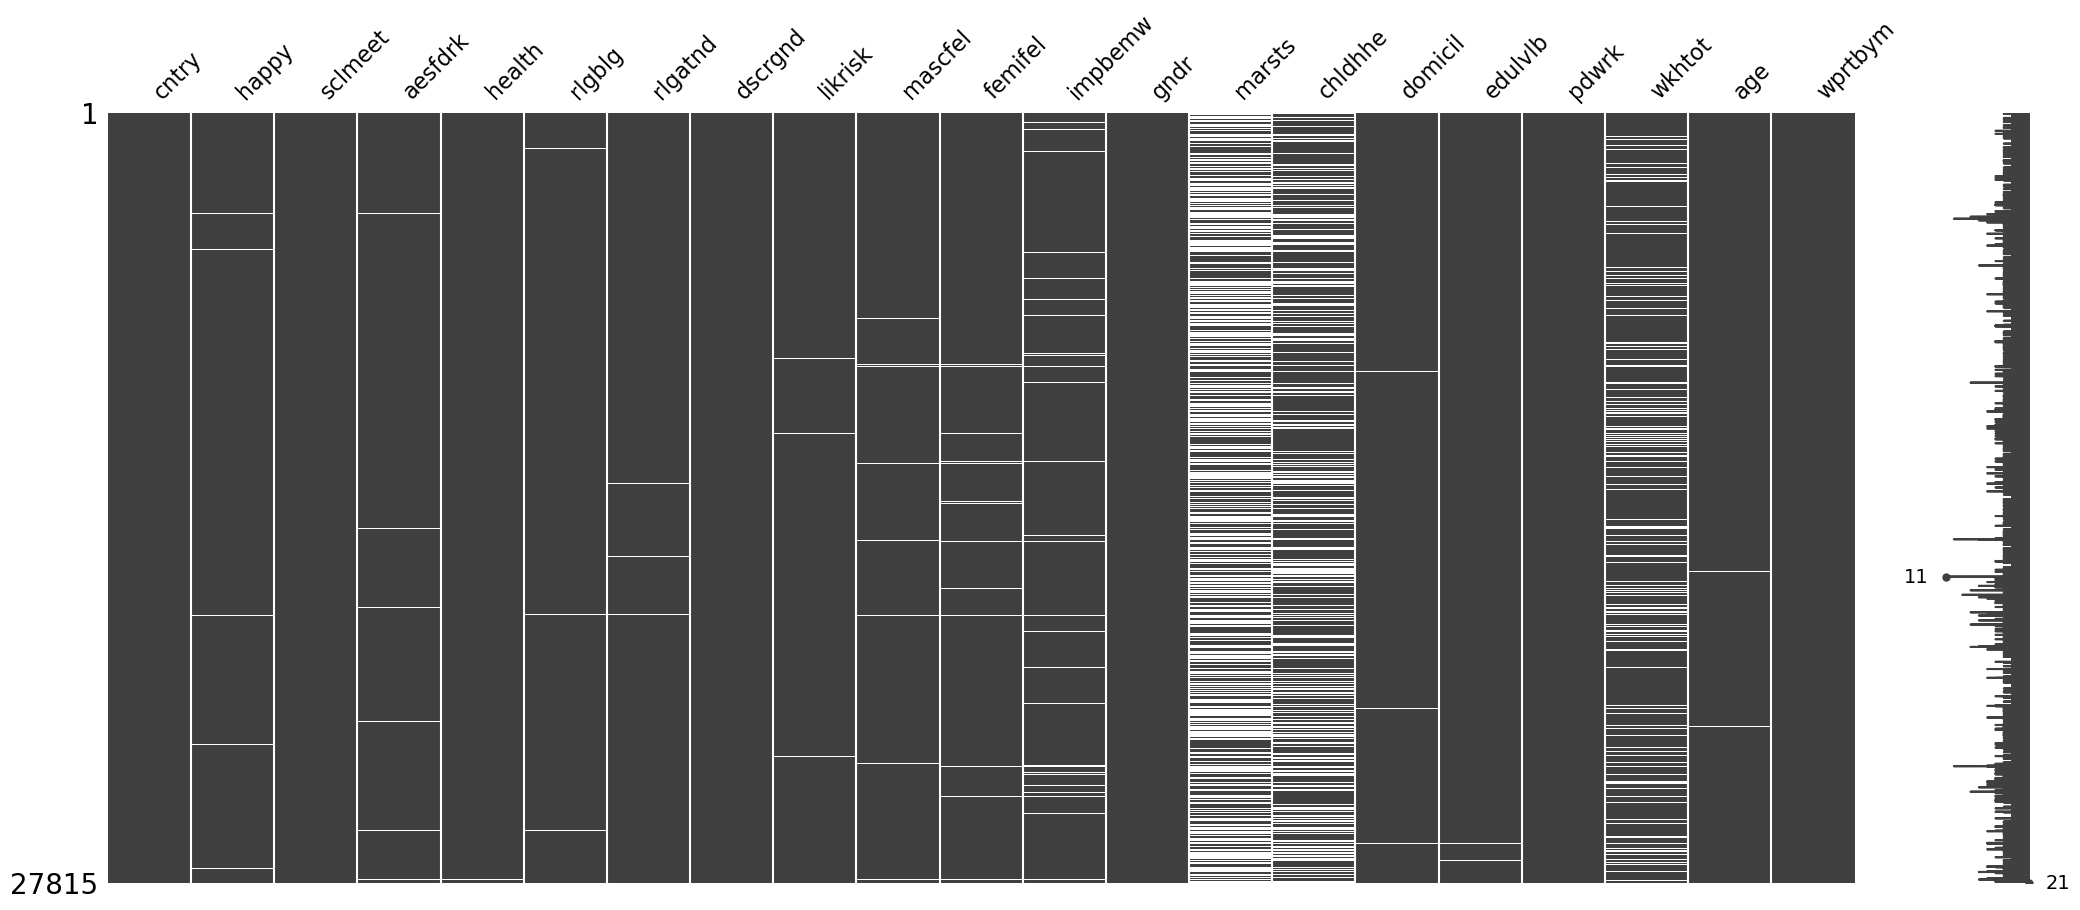

In [13]:
msno.matrix(data_model)

Variables like wkhtot, age, happy, sclmeet, and rlgatnd have missing patterns that look more random across the rows, but they sometimes align with other missing variables (like wkhtot aligning with some marsts missingness). Variables impbemw, mascfel, and femifel have small percentage of missing data, and their white blocks appear to be aligned vertically. This means that if a respondent is missing a value for impbemw, they are very likely also missing values for mascfel and femifel. This strongly suggests that the missingness mechanism is related to the specific topic of these questions (gender identity/importance). 

<Axes: >

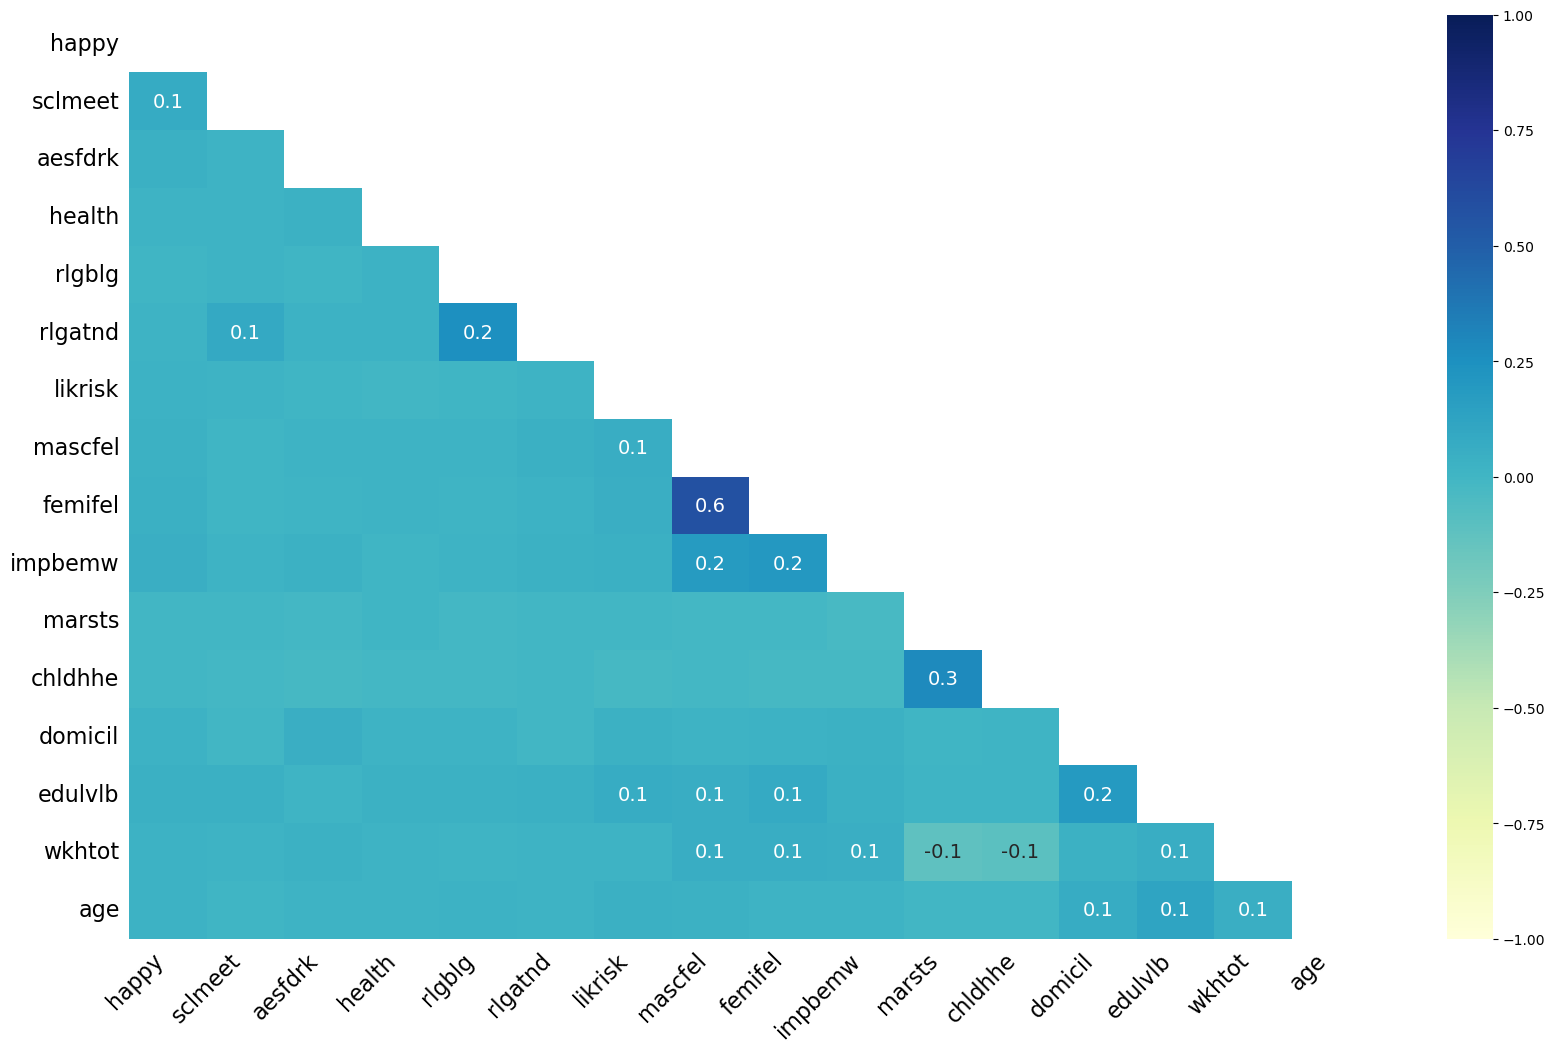

In [14]:
msno.heatmap(data_model, cmap="YlGnBu")

Missingness Correlation Heatmap , which measures how often the missingness of one variable co-occurs with the missingness of another. A score of (1.0) means they are always missing together. The variables mascfel and femifel are highly likely to be missing together  (0.6) sugessting a common underlying reason for non-response. <br> 
impbemw is correlated with both mascfel and femifel (0.2). While lower than 0.6, this confirms the cluster of missingness around the gender-related questions. <br> 
rlgblg and rlgatnd (0.2) variables are moderately missing together, which makes sense as one is about belonging to a religion and the other is about attendance. If a respondent refuses one, they might refuse the other. <br>
There is a moderate positive correlation (0.3). It means that records missing the chldhhe value are moderately more likely to also be missing the marsts value. So, it supports our previous findings. <br>
The correlation coefficients between mascfel, femifel, impbemw (Gender Identity/Importance) vs. wkhtot are weakly positive (apprx. 0.1) and suggest the missingness is mostly independent. The reasons for a non-response on highly sensitive gender identity questions are distinct from the reasons for a non-response on weekly work hours. This reinforces the finding that the gender identity variables (mascfel and femifel) form a strong, internal MNAR cluster (indicated by the strong correlation between them) and should be imputed primarily based on each other, rather than external factors like work hours. <br>
There is weak to moderate positive correlation (0.2) between edulvlb (education level) and domicil. Both variables have very low missingness. The slight correlation does not negate the use of the simple Mode Imputation for both, as the low volume of missing data means the bias introduced will be minimal, and the method is fast and preserves the discrete nature of the data. <br>
The correlation coefficients between martsts/chldhhe and wkhtot are slightly negative (apprx. -0.1). A correlation close to zero indicates largely independent missingness patterns. The factors causing non-response for personal status (marsts, chldhhe) are mostly different from the factors causing non-response for work status (wkhtot). This supports treating wkhtot separately for the further imputation strateg. <br>
To sum up, we can impute the highly/moderately correlated clusters using KNN, focusing on mascfel, femifel, impbemw and wkhtot as they are strongly predictive of each other missingness. Use Mode/Median for all other low-missingness variables.

In [15]:
data_model = data_model.drop(['marsts','chldhhe'], axis = 1)

# Check variables statistics
data_model.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
happy,7.499081,1.812472,0.0,8.0,10.0
sclmeet,4.784621,1.587595,1.0,5.0,7.0
aesfdrk,1.880081,0.77057,1.0,2.0,4.0
health,2.164141,0.917581,1.0,2.0,5.0
rlgblg,1.343637,0.47493,1.0,1.0,2.0
rlgatnd,5.346152,1.531552,1.0,6.0,7.0
dscrgnd,0.01474,0.120513,0.0,0.0,1.0
likrisk,2.625518,1.852314,0.0,3.0,6.0
mascfel,2.931502,2.559985,0.0,3.0,6.0
femifel,2.939753,2.57356,0.0,3.0,6.0


### Data imputation on the train dataset 

In [16]:
# Split the dataset for train and test 

# Target: 0/1  disagree vs agree 
y = data_model['wprtbym']   
# Features: 
X = data_model.drop(columns=['wprtbym'])

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,        
    random_state=42,      
    stratify=y            
)

In [17]:
# Impute with median continuous/ordinal variables
age_median = X_train['age'].median()
happy_median = X_train['happy'].median()
likrisk_median = X_train['likrisk'].median()

# Impute with mode categorical/low-missingness ordinal variables
health_mode = X_train['health'].mode()[0]
domicil_mode = X_train['domicil'].mode()[0]
sclmeet_mode = X_train['sclmeet'].mode()[0]
aesfdrk_mode = X_train['aesfdrk'].mode()[0]
rlgblg_mode = X_train['rlgblg'].mode()[0]
rlgatnd_mode = X_train['rlgatnd'].mode()[0]
edulvlb_mode = X_train['edulvlb'].mode()[0]

def imputing_na(df):
    imputation_map = {
        'age': age_median,
        'happy': happy_median,
        'likrisk': likrisk_median,
        'health': health_mode,
        'domicil': domicil_mode,
        'sclmeet': sclmeet_mode,
        'aesfdrk': aesfdrk_mode,
        'rlgblg': rlgblg_mode,
        'rlgatnd': rlgatnd_mode,
        'edulvlb': edulvlb_mode
    }

    df.fillna(imputation_map, inplace=True) 

    print(df.isna().sum())
    return df

In [18]:
imputing_na(X_train)

cntry         0
happy         0
sclmeet       0
aesfdrk       0
health        0
rlgblg        0
rlgatnd       0
dscrgnd       0
likrisk       0
mascfel     231
femifel     232
impbemw     634
gndr          0
domicil       0
edulvlb       0
pdwrk         0
wkhtot     3065
age           0
dtype: int64


,cntry,happy,sclmeet,aesfdrk,health,rlgblg,rlgatnd,dscrgnd,likrisk,mascfel,femifel,impbemw,gndr,domicil,edulvlb,pdwrk,wkhtot,age
546,AT,9.0,4.0,1.0,2.0,1,5.0,0,0.0,5.0,0.0,4.0,1,5.0,322.0,0,40.0,76.0
6296,DE,8.0,5.0,2.0,2.0,1,6.0,0,6.0,6.0,0.0,5.0,1,1.0,322.0,1,40.0,60.0
32083,PL,6.0,4.0,2.0,2.0,2,6.0,0,3.0,0.0,6.0,3.0,2,3.0,313.0,0,NaN,25.0
21822,IE,9.0,6.0,1.0,2.0,2,7.0,0,3.0,6.0,0.0,3.0,1,3.0,620.0,0,22.0,53.0
24143,IS,9.0,7.0,3.0,2.0,1,6.0,0,2.0,0.0,6.0,NaN,2,2.0,720.0,1,36.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,FI,8.0,6.0,1.0,3.0,2,7.0,0,5.0,4.0,2.0,3.0,1,2.0,710.0,1,15.0,78.0
23390,IE,8.0,3.0,2.0,1.0,1,7.0,0,3.0,0.0,5.0,6.0,2,2.0,720.0,1,0.0,54.0
27336,IT,7.0,5.0,2.0,2.0,1,4.0,0,3.0,6.0,0.0,6.0,1,4.0,113.0,1,10.0,38.0
5515,CY,7.0,4.0,2.0,1.0,1,3.0,0,4.0,6.0,0.0,6.0,1,2.0,313.0,1,48.0,42.0


In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

knn_cols = ['wkhtot', 'impbemw', 'mascfel', 'femifel']
var_ranges = {
    'mascfel': (0, 6),
    'femifel': (0, 6),
    'impbemw': (0, 6),
    'wkhtot': (0, 168),   # hours per week
}

def fit_knn_imputer(df, knn_cols):
    feats = df.select_dtypes(include=np.number).columns.tolist()
    scaler = StandardScaler()
    imputer = KNNImputer(n_neighbors=5)

    df_scaled = scaler.fit_transform(df[feats])
    df_imp_scaled = imputer.fit_transform(df_scaled)
    df_imp = scaler.inverse_transform(df_imp_scaled)
    df_imp = pd.DataFrame(df_imp, columns=feats, index=df.index)

    for col, (low, high) in var_ranges.items():
        df_imp[col] = df_imp[col].clip(lower=low, upper=high)
        if col in knn_cols:
            df_imp[col] = df_imp[col].round()

    for col in knn_cols:
        df[col] = df_imp[col]

    return df, scaler, imputer, feats

def apply_knn_imputer(df, knn_cols, scaler, imputer, feats):
    df_scaled = scaler.transform(df[feats])
    df_imp_scaled = imputer.transform(df_scaled)
    df_imp = scaler.inverse_transform(df_imp_scaled)
    df_imp = pd.DataFrame(df_imp, columns=feats, index=df.index)

    for col, (low, high) in var_ranges.items():
        df_imp[col] = df_imp[col].clip(lower=low, upper=high)

        if col in knn_cols:
            df_imp[col] = df_imp[col].round()

    for col in knn_cols:
        df[col] = df_imp[col]        

    return df


In [20]:
X_train, scaler, imputer, feats = fit_knn_imputer(X_train, knn_cols)
imputing_na(X_train)
X_train.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

cntry      0
happy      0
sclmeet    0
aesfdrk    0
health     0
rlgblg     0
rlgatnd    0
dscrgnd    0
likrisk    0
mascfel    0
femifel    0
impbemw    0
gndr       0
domicil    0
edulvlb    0
pdwrk      0
wkhtot     0
age        0
dtype: int64


,mean,std,min,50%,max
happy,7.498966,1.8069,0.0,8.0,10.0
sclmeet,4.789143,1.584988,1.0,5.0,7.0
aesfdrk,1.88046,0.767,1.0,2.0,4.0
health,2.168794,0.916887,1.0,2.0,5.0
rlgblg,1.340733,0.473967,1.0,1.0,2.0
rlgatnd,5.351834,1.531015,1.0,6.0,7.0
dscrgnd,0.01456,0.119788,0.0,0.0,1.0
likrisk,2.63064,1.848751,0.0,3.0,6.0
mascfel,2.925535,2.555849,0.0,3.0,6.0
femifel,2.936186,2.567759,0.0,3.0,6.0


In [21]:
# impute missing values in the test set 
X_test = apply_knn_imputer(X_test, knn_cols, scaler, imputer, feats)
imputing_na(X_test)
X_test.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

cntry      0
happy      0
sclmeet    0
aesfdrk    0
health     0
rlgblg     0
rlgatnd    0
dscrgnd    0
likrisk    0
mascfel    0
femifel    0
impbemw    0
gndr       0
domicil    0
edulvlb    0
pdwrk      0
wkhtot     0
age        0
dtype: int64


,mean,std,min,50%,max
happy,7.506741,1.82281,0.0,8.0,10.0
sclmeet,4.777458,1.595148,1.0,5.0,7.0
aesfdrk,1.882617,0.772173,1.0,2.0,4.0
health,2.144526,0.917468,1.0,2.0,5.0
rlgblg,1.345677,0.475631,1.0,1.0,2.0
rlgatnd,5.359698,1.536517,1.0,6.0,7.0
dscrgnd,0.015459,0.123382,0.0,0.0,1.0
likrisk,2.609204,1.856716,0.0,3.0,6.0
mascfel,2.923962,2.566863,0.0,3.0,6.0
femifel,2.937983,2.587192,0.0,3.0,6.0


### EDA

#### Target variable

In [22]:
y_train.value_counts(normalize=True)

wprtbym
1.0    0.744832
0.0    0.255168
Name: proportion, dtype: float64

(array([ 5678.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

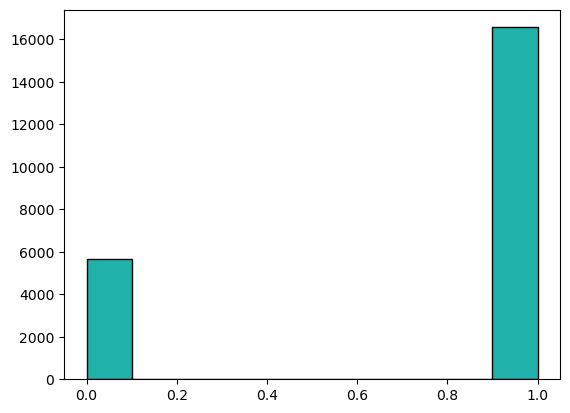

In [23]:
from matplotlib import pyplot as plt
plt.hist(y_train, color='lightseagreen', edgecolor='black')

The plot illustrates that larger share of respondents agree with the statement “women should be protected by men” (coded 1) than disagree (coded 0). The target variable is skewed towards agreement, implying that metrics like accuracy alone may be misleading and that we need also consider precision, recall, and F1 for the minority (disagree) class when evaluating models.

#### Correlation matrix

<Axes: >

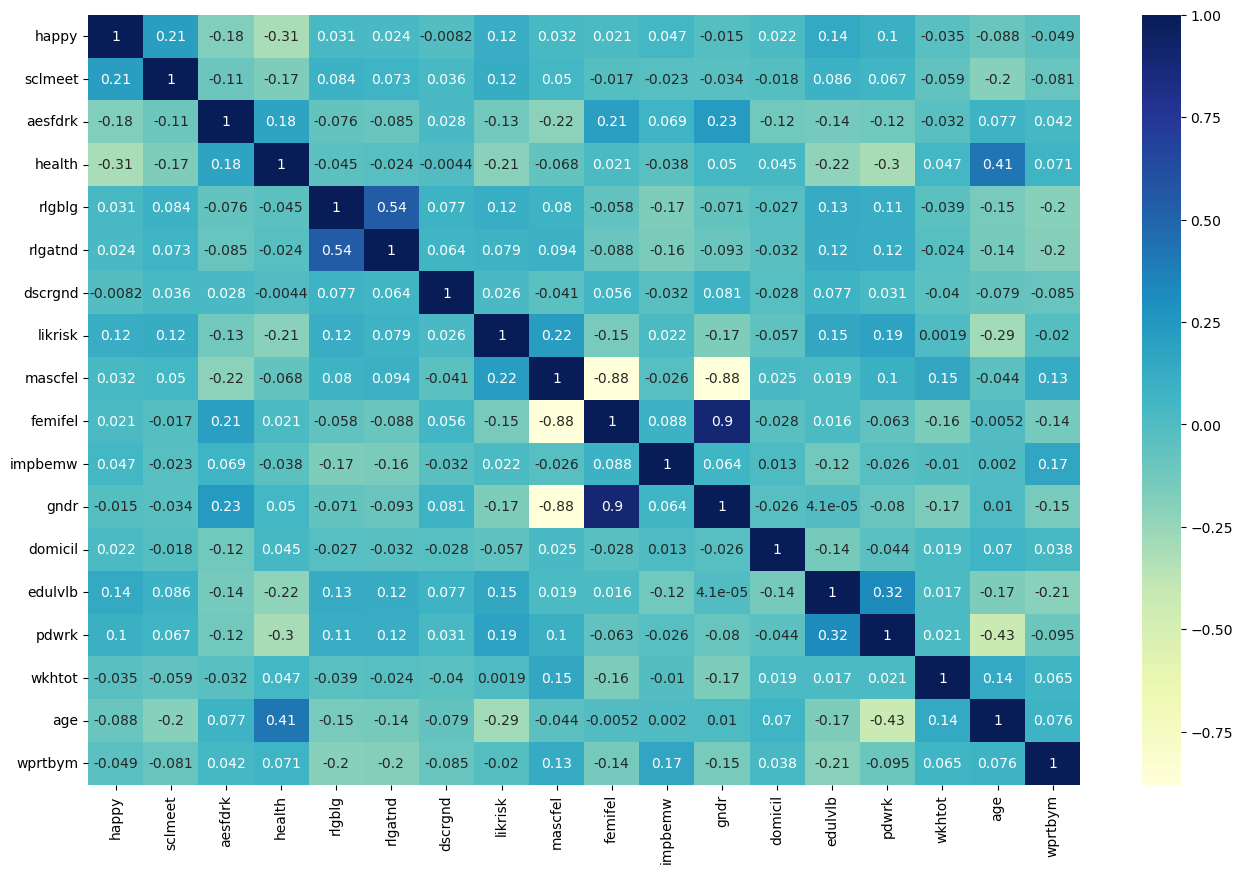

In [24]:
import seaborn as sns

train = X_train.join(y_train)
plt.figure(figsize=(16,10))
sns.heatmap(train.corr(numeric_only = True), cmap='YlGnBu', annot=True)

The correlation matrix shows that 'wprtbym' (agreement that “women should be protected by men”) has only weak linear correlations with individual predictors, but the signs and relative magnitudes are substantively interpretable and still could be useful for modeling. The largest positive correlations are with: 'impbemw' (importance of being a man/woman,  0.17), 'age' (0.08), 'happy' and 'wkhtot' (0.07). The largest negative correlations are with: 'likrisk' (liking risk, −0.13),
'pdwrk' (working last 7 days, −0.095), 'aesfdrk' (safety after dark, −0.08). <br>
This indicates that respondents who see gender as more central to their identity, are older, and perhaps somewhat more satisfied or working fewer hours, tend to agree slightly more with the protection statement, while those with higher risk tolerance or currently working tend to agree slightly less. The effect sizes, however, are small. This framing both acknowledges the small correlations and justifies continuing with 'wprtbym' as a meaningful but challenging classification target.

##### High positive correlation

Firstly, we want to visualize the distribution of the variables that are highly and positively correlated between each other, according to what we saw in the heatmap. Namely, these variables are: 'age' vs. 'health' (0.41),'gndr' vs. 'femilfel' (0.9), and 'rlgatnd' vs. 'rlgblg' (0.54). Let's start with distribution of the variables. 

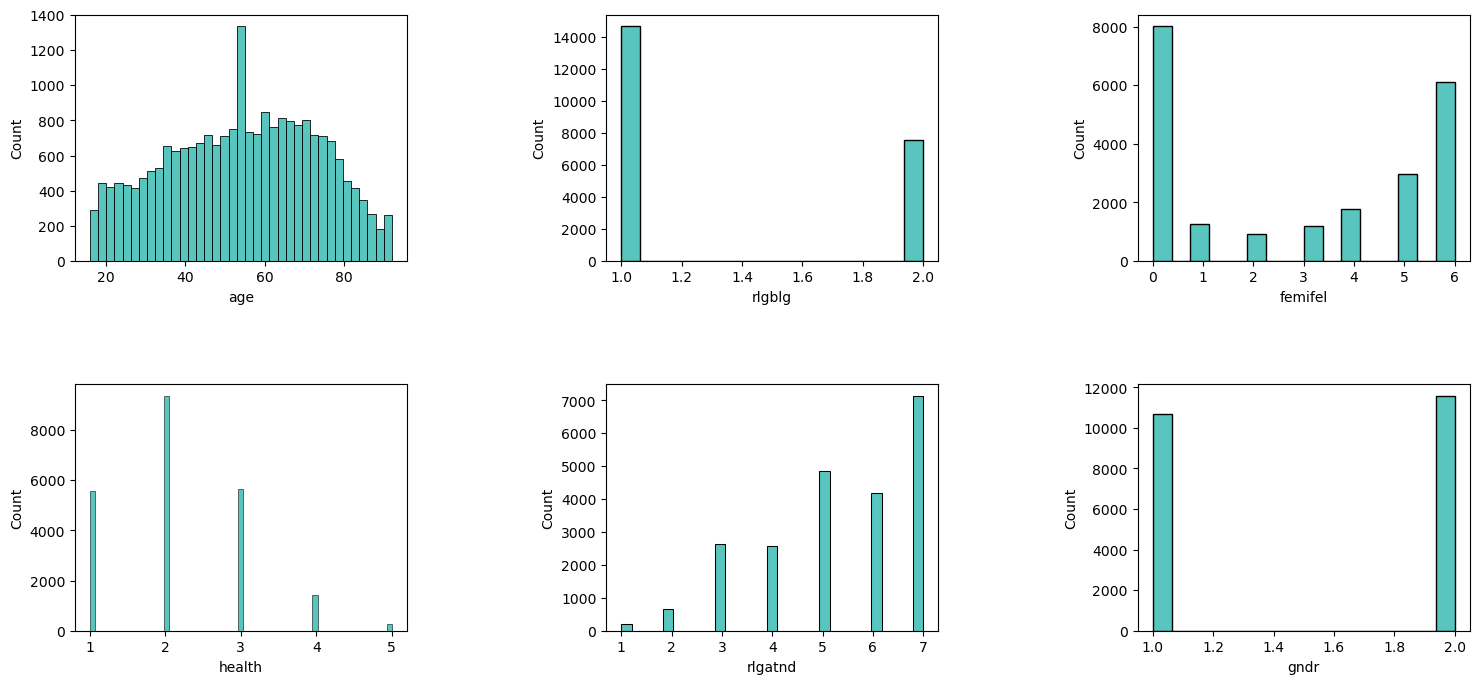

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(18,8))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ['age', 'rlgblg','femifel',
                             'health', 'rlgatnd','gndr']):
    sns.histplot(train[v], kde=False, color='lightseagreen',
                 ax=ax)
    ax.set(ylabel="Count");

The first distribution pair set, 'age' and 'health' variables, illustrates that the age histogram is roughly bell‑shaped with most respondents between about 30 and 80, peaking around the mid‑50s. The health histogram is strongly skewed to “good” values: most people report 2 (“good”) or 3 (“fair”), with fewer at 1 (“very good”) and very few at 4–5 (“bad/very bad”). Given these shapes, a positive correlation around 0.4 means that as age increases, the distribution shifts gradually toward worse self‑reported health: older respondents are more likely to choose 3–5 instead of 1–2, even though good health is still common at many ages. <br>

The second distribution pair set, 'femifel' and 'gndr' variables, shows that 'rlgblg' almost binary in practice: a large bar at 1 (“belongs to a religion”) and a sizeable but smaller bar at 2 (“does not belong”). 'rlgatnd' spans 1–7, but the distribution is concentrated at higher numeric codes (infrequent attendance / never), with fewer people at 1–3 (frequent attendance). The moderate positive correlation arises because belonging and attendance co‑move: those who say they belong to a religion are more likely to choose lower rlgatnd values (more frequent attendance), while non‑belongers cluster at high rlgatnd values (rarely or never attend), but there is still overlap (some belongers attend rarely, some non‑belongers attend occasionally). <br>

The third distribution pair set, 'rlgblg' vs. 'rlgatnd', shows that 'gndr' has two clear spikes at 1 and 2 (male/female). We can see that most of the respondents are women, but the number is little slightly beggaer, than number of men participated. 'femifel' is bimodal: a large mass at 0 (“not at all feminine”) and another large mass at 6 (“very feminine”), with smaller counts in between. A correlation of ~0.9 is expected here: males (1) mostly cluster at low femifel values, and females (2) mostly cluster at high femifel values. The distributions are essentially separating by sex, so “feeling feminine” is almost a proxy for gender in this sample.<br>

#### Moderate positive correlation <br>
Secondly, we want to visualize the distribution of the variables that are moderately and positively correlated  between each other, according to what we saw in the heatmap. 

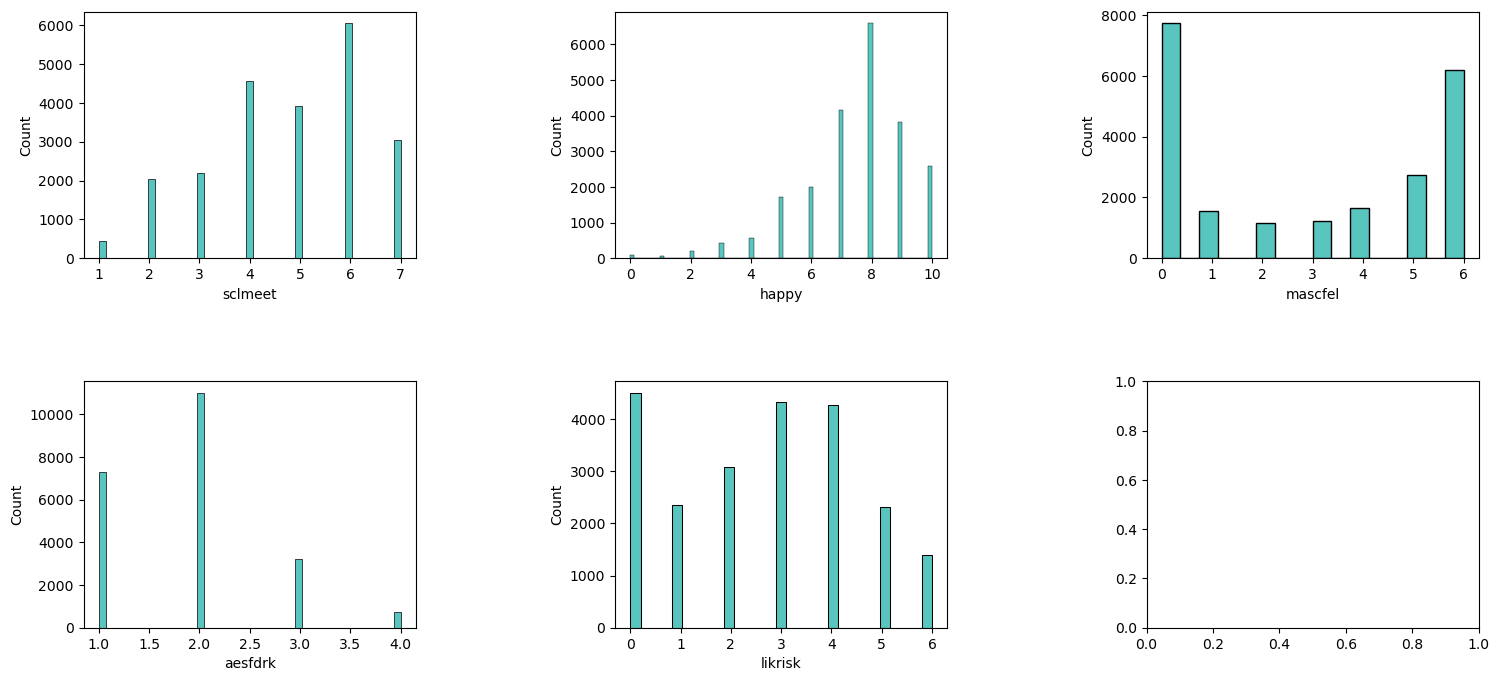

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(18,8))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ['sclmeet', 'happy', 'mascfel',
                              'aesfdrk', 'likrisk']):
    sns.histplot(train[v], kde=False, color='lightseagreen',
                 ax=ax)
    ax.set(ylabel="Count");

The histograms and the correlation matrix together tell a consistent story about how these variables relate to each other. 'sclmeet' (social meetings) is right‑skewed toward higher values: many respondents meet friends “several times a month” to “several times a week”, fewer report very low contact. 'happy' is also skewed toward high values, with most answers between 6 and 9 on the 0–10 scale; very low happiness is rare. 'mascfel' is U‑shaped: a big group at 0 (“not at all masculine”) and another big group at 6 (“very masculine”), with fewer in the middle. Pretty the same pattern as for the 'femifel' variable. 'aesfdrk' (safety after dark) is concentrated on 1–3, mostly at 1–2 (“very safe/safe”), with relatively few at 4 (“very unsafe”). 'likrisk' is more spread: there is mass at both low risk‑taking (0–1) and moderate risk‑taking (3–4), with fewer at the extreme of high risk-taking. These shapes already suggest that many respondents report positive social, emotional, and safety conditions, while gender‑identity items are more polarized. <br>
From the matrix, correlations are moderate (roughly 0.2–0.3) for the following pairs: 'sclmeet' vs. 'happy' (0.21), this correlation reflects a general tendency, where more frequent social contact is associated with greater self‑reported happiness, though the effect is far from deterministic. 'gndr' vs. 'aesfdrk', gender and perceived safety after dark are linked: one gender group reports feeling unsafe somewhat more often. Because aesfdrk is skewed toward “safe” overall, the correlation indicates that the minority feeling unsafe is disproportionately concentrated in one gender category, generating this modest positive association. 'femifel' vs. 'aesfdrk' (0.21), those scoring higher on “feeling feminine” are more likely to report feeling unsafe, while those scoring low on feminity concentrate more on “very safe / safe”; the bimodal distribution of 'femifel' and the skew of 'aesfdrk' together produce this moderate positive correlation. 'health' vs. 'aesfdrk' (0.18), this suggests that respondents in poor health are somewhat more likely to choose higher (more unsafe) categories, but many healthy people also report feeling safe. mascfel vs. likrisk (0.22), respondents who feel more masculine tend to score higher on risk‑taking. 
Overall,  these pairs show meaningful but moderate associations. None of these relationships is strong enough to cause multicollinearity problems, but they fit well with substantive expectations from social behavior.

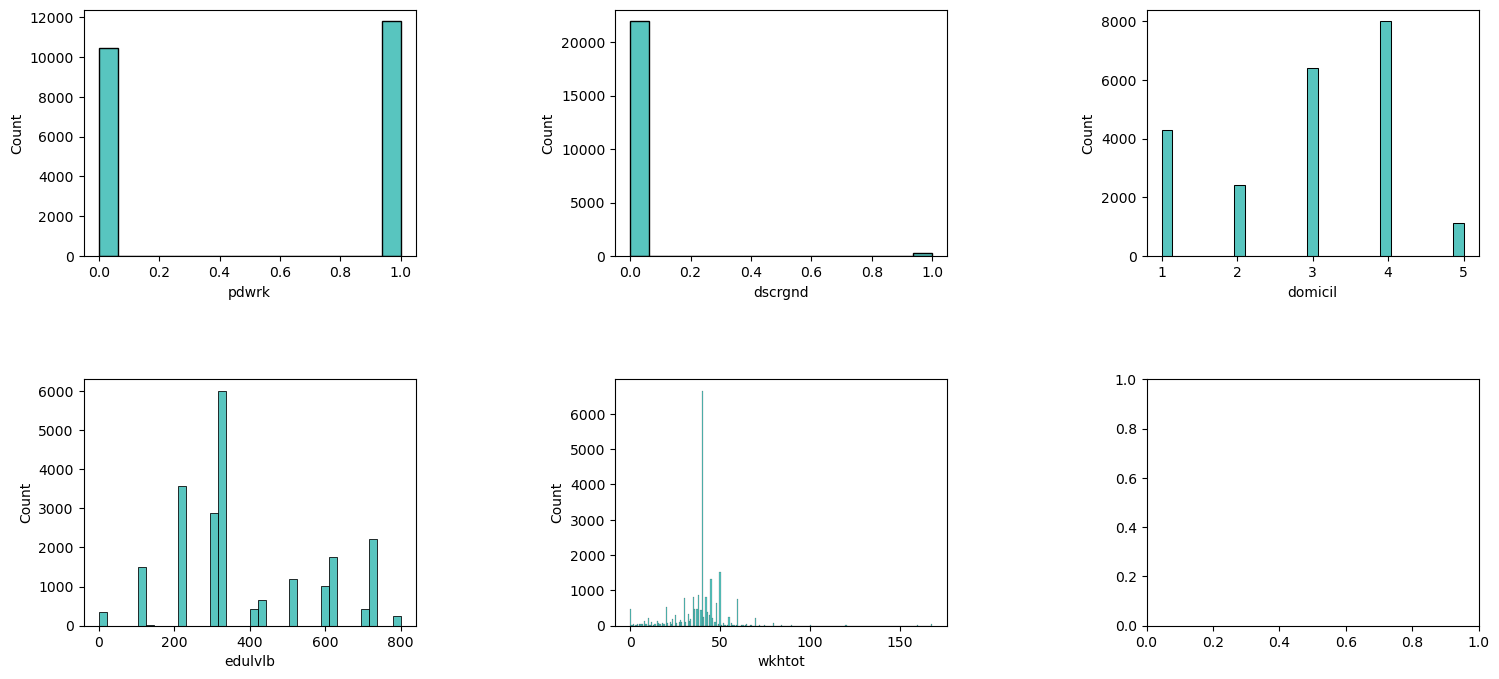

In [27]:
# Plot all other variables distribution 
fig, axes = plt.subplots(2, 3, figsize=(18,8))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ['pdwrk','dscrgnd','domicil',
                             'edulvlb', 'wkhtot']):
    sns.histplot(train[v], kde=False, color='lightseagreen',
                 ax=ax)
    ax.set(ylabel="Count");

From the last grid of histograms, the remaining variables have the following main patterns: <br>
'pdwrk' (paid work last 7 days) is almost balanced. This means a substantial share of respondents are in paid work and a substantial share are not, which will help the model learn differences by labour‑market status. 'dscrgnd' (experienced gender discrimination) is extremely skewed: the bar at 0 dominates, with only a small bar at 1. Very few respondents report discrimination. This variable is highly imbalanced and will contribute limited variation, but it may still capture a specific subgroup signal. 'domicil' (place of residence) shows all 5 categories used, with the highest counts in codes 3–4 (town/small city, country village) and fewer in big city (1) and countryside farm (5). Urban and semi‑urban residences dominate. 'edulvlb' (education code) is multi‑modal with several spikes at specific codes (e.g. 322, 423, 620, 710, 720, 1), corresponding to common educational qualifications. Lower codes around 200–400 are most frequent, while very high codes like 1 are rare. This confirms that 'edulvlb' is a categorical code, not a continuous scale, and should be treated that way in modeling. 'wkhtot' (weekly working hours) is right‑skewed with a strong peak around 40 hours and a long tail toward high hours (up to ~160). Many workers cluster at standard full‑time hours, with smaller groups at part‑time and some at very long hours. Zero or very low hours appear for some people despite being marked as in paid work, likely reflecting marginal or irregular work time. <br>
Overall, these distributions show that most remaining predictors are either clearly binary, multi‑category nominal, or skewed continuous quantities, which could justify the further preprocessing strategy.

#### High negative correlation <br>
Next, we want to visualize the distribution of the variables that are highly and negatively correlated  between each other, according to what we saw in the heatmap. <br>
'femifel' vs. 'mascfel' (−0.88), because both scales run from 0 to 6 and many people sit at extremes (very masculine vs very feminine), those who rate themselves high on femininity tend to rate low on masculinity, and vice versa.​ The U‑shaped distributions that are mirror images explain the very strong negative correlation: as one scale increases, the other decreases almost linearly at the aggregate level. 'mascfel' vs. 'gndr' (−0.88) males cluster at high masculinity values, females at low values.​ This produces a strong negative correlation: moving from gender code 1 to 2 is associated with a large drop in 'mascfel'. 'age' vs. 'pdwrk' (−0.43), older respondents are much more likely to be out of paid work (retired), whereas prime‑age respondents more often have: 'pdwrk' = 1.​​ Since age has a wide spread and 'pdwrk' is binary, the negative correlation reflects that the probability of being in paid work declines with age; younger people cluster at pdwrk = 1, older at pdwrk = 0. age vs. likrisk (−0.29) younger respondents tend to report higher willingness to take risks, while risk appetite gradually declines with age.​<br>
To sum up, these strong negative correlations capture expected social patterns. Despite the high correlations, they mainly pose interpretation issues for linear models; tree‑based models can handle them without serious numerical problems.


#### Moderately negative correlation <br>
Next, we want to visualize the distribution of the variables that are moderately and negatively correlated  between each other, according to what we saw in the heatmap. The moderate negative correlations we highlighted are all consistent with the shapes of the distributions and with plausible social patterns.<br>
'health' vs. 'happy' (−0.30), where health is coded so that higher values mean worse health (1 = very good, 5 = very bad), while happy is coded so that higher values mean more happiness. Both distributions are skewed toward “good” outcomes (most people report good health and high happiness), but there is variation.​The negative correlation means that as self‑reported health gets worse (health → 4–5), average happiness decreases; individuals with very bad health are more likely to give lower happiness scores. This is a moderate but not extreme pattern: many people in fair or even poor health still report high happiness. 'health' vs. 'likrisk' (−0.29), where 'likrisk' measures willingness to take risks and is spread across the 0–6 scale, with mass at both low and moderate risk.​ The negative correlation indicates that respondents in worse health tend to report somewhat lower risk‑taking. People with very good health can be found at all risk levels, but as health declines, the distribution shifts toward the low‑risk end, lowering the overall mean. 'mascfel' vs. 'aesfdrk' (−0.22), the negative correlation (given that higher 'aesfdrk' means feeling more unsafe) suggests that those who feel more masculine tend, on average, to report greater safety after dark, while those scoring low on masculinity report slightly more insecurity. The effect is moderate: many high‑masculinity respondents still feel unsafe, and many low‑masculinity respondents feel safe. 'age' vs. 'sclmeet' (−0.20),the negative correlation reflects that older respondents meet friends less often: as age increases, the distribution of sclmeet shifts from “several times a week/every day” toward “once a week/less often”. Younger adults cluster more at high contact frequencies, pulling the correlation negative.<br>
None of these correlations is strong enough to cause modeling problems, but they provide useful substantive context for interpreting later model results.

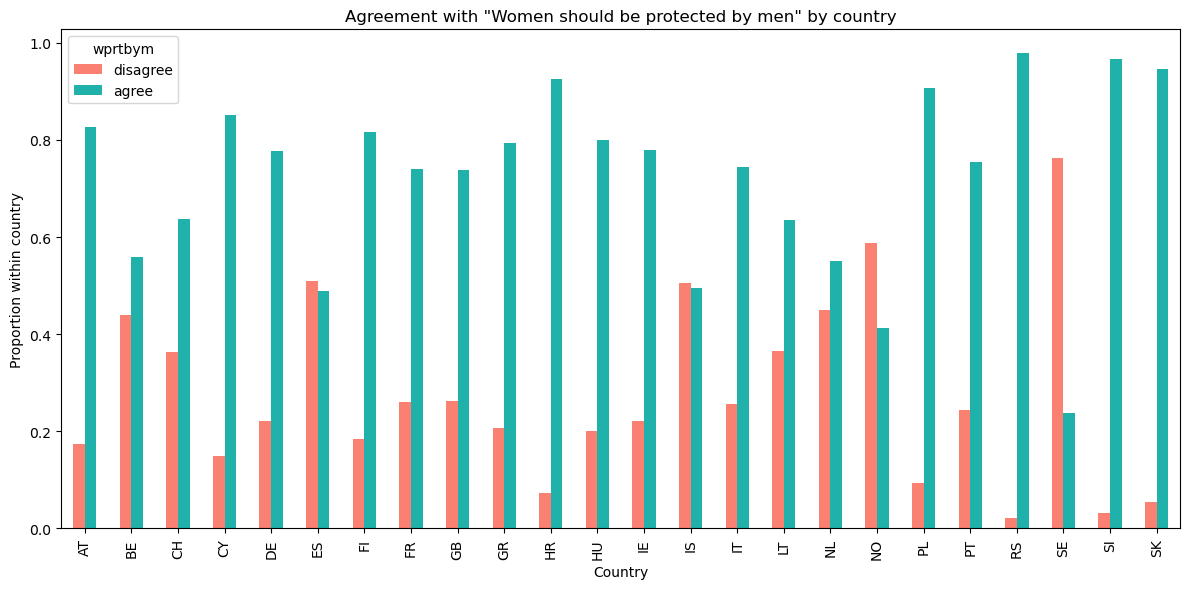

In [28]:
cntry_ct = pd.crosstab(X_train['cntry'], y_train, normalize='index')

cntry_ct.columns = ['disagree', 'agree']

ax = cntry_ct.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightseagreen'])
ax.set_xlabel('Country')
ax.set_ylabel('Proportion within country')
ax.set_title('Agreement with "Women should be protected by men" by country')
plt.legend(title='wprtbym')
plt.tight_layout()
plt.show()

The plot shows within‑country proportions of disagreement and agreement with “Women should be protected by men”, so each pair of bars sums to 1 for a given country.  From this plot we could find quite curious patterns. In most countries, the lightseagreen bar (agree) is clearly higher than the salmon bar (disagree), confirming the overall skew of the target variable toward agreement. Countries such as HR, HU, PL, PT, SE, SI, and SK show very high agreement shares (around 90–100%), meaning that disagreement is rare there. A few countries have more balanced attitudes, where disagreement approaches or slightly exceeds 40–50%: examples include IS, NL, LT, and ES. In these contexts, the norm that “women should be protected by men” is more contested. Some countries stand out with relatively high disagreement (short agree bar, tall disagree bar) compared to the rest, suggesting cross‑national variation in gender‑norm attitudes that the future model(s) may exploit via the 'cntry' feature. Thus, the country context is likely an important predictor. 

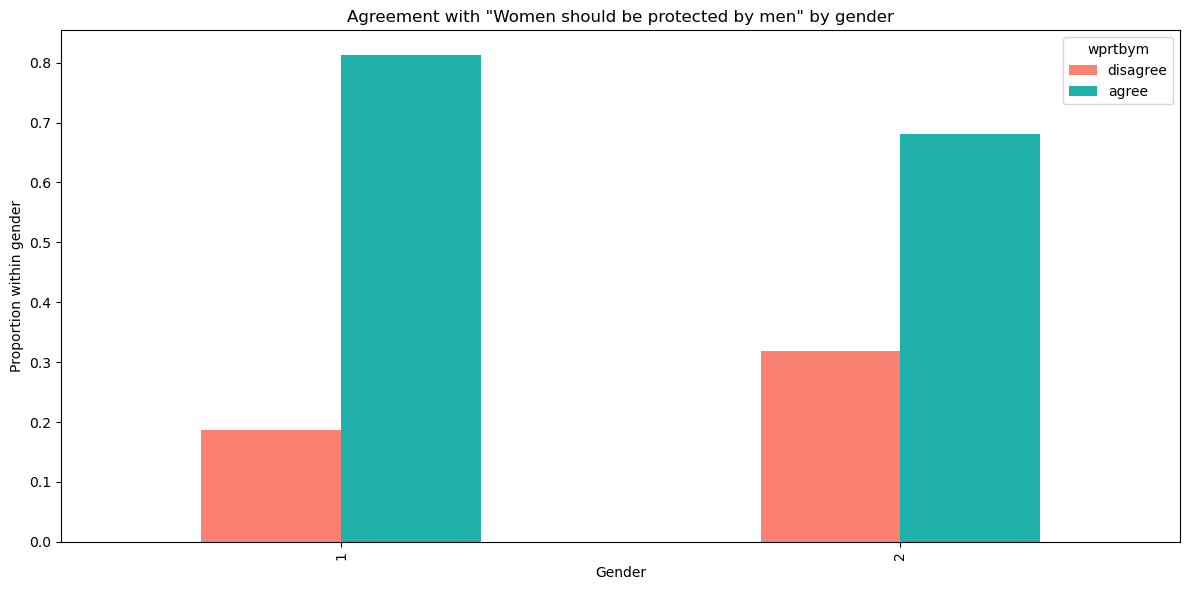

In [29]:
gndr_ct = pd.crosstab(X_train['gndr'], y_train, normalize='index')

gndr_ct.columns = ['disagree', 'agree']

ax = gndr_ct.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightseagreen'])
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion within gender')
ax.set_title('Agreement with "Women should be protected by men" by gender')
plt.legend(title='wprtbym')
plt.tight_layout()
plt.show()

In the gender plot, both groups show majority agreement, but the proportions differ: Gender code 1 (men) has around 80% agree and 20% disagree. Gender code 2 (women) has a lower agreement rate, roughly 70% agree and 30% disagree. This indicates that men are more likely than women to support the statement, which fits the idea that the norm “women should be protected by men” is more endorsed by the group cast as protectors.

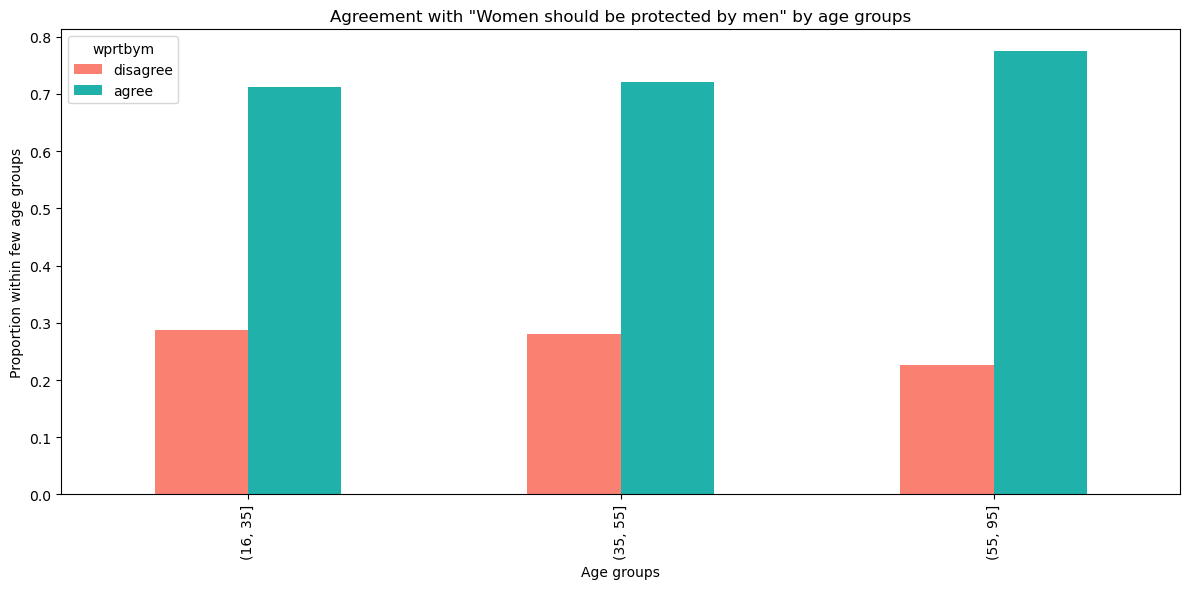

In [30]:
age_ct = pd.crosstab(pd.cut(X_train['age'], [16,35,55,95]), y_train, normalize='index')

age_ct.columns = ['disagree', 'agree']

ax = age_ct.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightseagreen'])
ax.set_xlabel('Age groups')
ax.set_ylabel('Proportion within few age groups')
ax.set_title('Agreement with "Women should be protected by men" by age groups')
plt.legend(title='wprtbym')
plt.tight_layout()
plt.show()

Across age bands (16–35, 35–55, 55–95), agreement is high in all groups but shows a mild upward trend with age: Young and middle‑aged groups have about 71–72% agreement. The oldest group (55–95) has the highest agreement, close to 78%, and the lowest disagreement. This matches the earlier correlation: older respondents are somewhat more supportive of the traditional protection norm than younger ones.

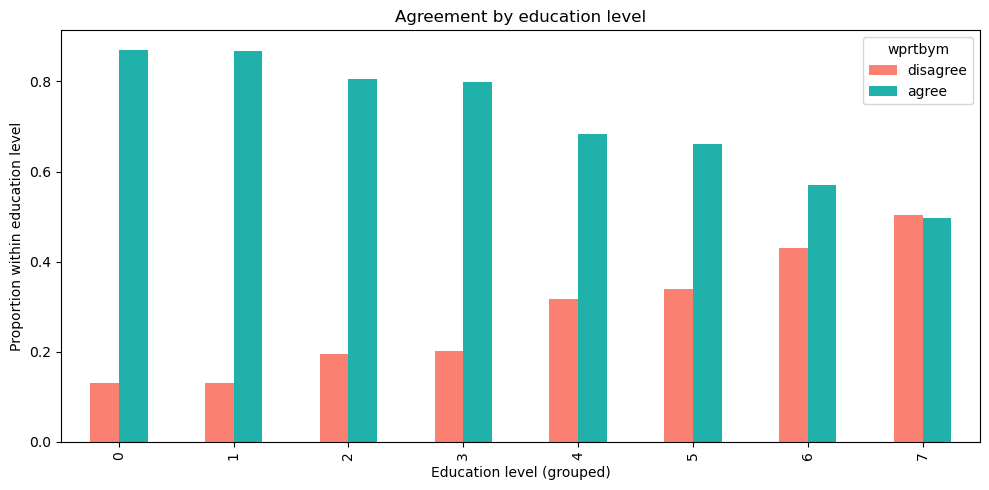

In [31]:
edu_map = {
    0: 0, 1: 0,  # 0 (not completed ISCED 1), 1 (other / unspecified)
    113: 1,      # Primary 113 (ISCED 1)
    129: 2, 212: 2, 213: 2, 221: 2, 222: 2, 223: 2,   # Lower secondary (ISCED 2)
    229: 3, 311: 3, 312: 3, 313: 3, 321: 3, 322: 3, 323: 3, # Upper secondary (ISCED 3)
    412: 4, 413: 4, 421: 4, 422: 4, 423: 4, # Post-secondary non‑tertiary (ISCED 4)
    510: 5, 520: 5, 610: 5, 620: 5, # Short/medium tertiary (BA or equivalent)
    710: 6, 720: 6, # Long tertiary (MA or equivalent)
    800: 7 # Doctoral
}

X_train['edu_group'] = X_train['edulvlb'].map(edu_map)

edu_ct = pd.crosstab(X_train['edu_group'], y_train, normalize='index')
edu_ct.columns = ['disagree', 'agree']

ax = edu_ct.plot(kind='bar', figsize=(10,5), color=['salmon', 'lightseagreen'])
ax.set_xlabel('Education level (grouped)')
ax.set_ylabel('Proportion within education level')
ax.set_title('Agreement by education level')
plt.legend(title='wprtbym')
plt.tight_layout()


For low education levels (0–2: below primary, primary, lower secondary), agreement is very high: around 80–90% agree and only 10–20% disagree. As education increases, the agreement share declines and disagreement rises. At the highest levels (6–7: long tertiary and doctorate), agreement and disagreement are almost balanced, with disagreement around 45–50%. This suggests a clear gradient: higher education is associated with weaker support for the protection statement, while lower education groups tend to endorse it more strongly.

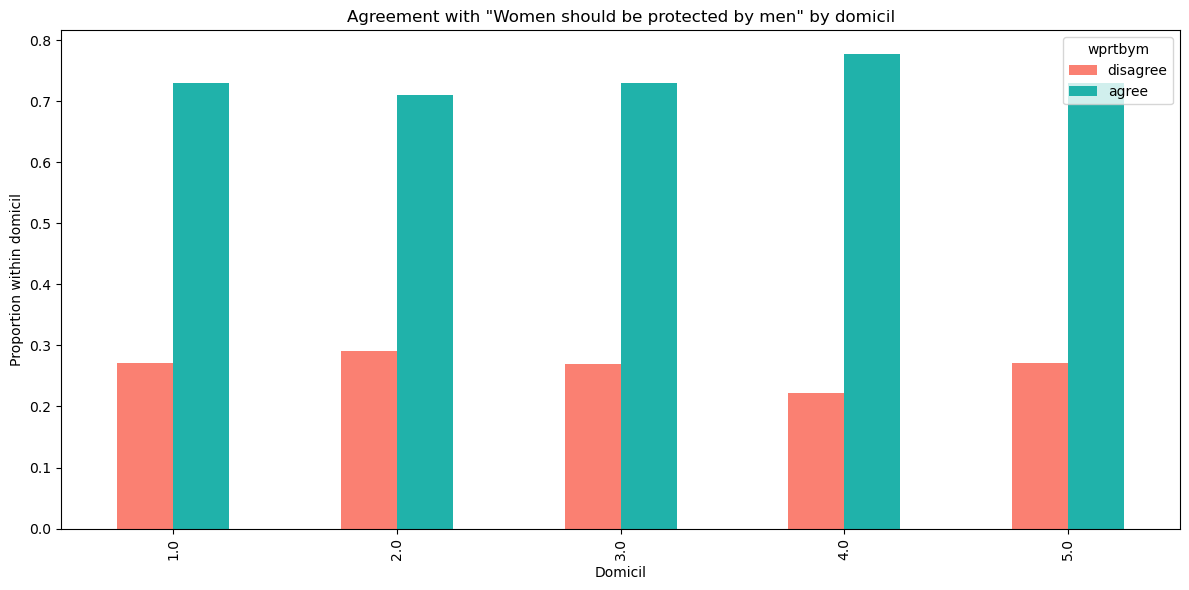

In [32]:
domicil_ct = pd.crosstab(X_train['domicil'], y_train, normalize='index')

domicil_ct.columns = ['disagree', 'agree']

ax = domicil_ct.plot(kind='bar', figsize=(12, 6), color=['salmon', 'lightseagreen'])
ax.set_xlabel('Domicil')
ax.set_ylabel('Proportion within domicil')
ax.set_title('Agreement with "Women should be protected by men" by domicil')
plt.legend(title='wprtbym')
plt.tight_layout()
plt.show()

Agreement is relatively stable across domicile categories (1–5), always around 70–78%. There is only a weak urban‑rural gradient: rural respondents are marginally more likely to agree with the statement, but differences by residence are small compared to those by education or gender.

### Feature engineering 

In this section, we use the insights from Exploratory Data Analysis section to engineer the features of our dataset. During the EDA and missing data imputation process some of the steps have already implemented. 

#### Variables recoding
The target variable 'wprtbym' capturing agreement with the statement “Women should be protected by men” is recoded into a binary outcome: responses 1 (“agree strongly”) and 2 (“agree”) are grouped as agree, responses 4 (“disagree”) and 5 (“disagree strongly”) re grouped as disagree, while category 3 (“neither agree nor disagree”) is treated as missing and excluded from the target definition.

##### Creating new derived features
We introduce a new feature age by substracting the survey participant year of birth from the current year: 'age' = current_year - 'yrbrn'. <br>
In addition, respondents were assigned to broad age groups (e.g. 16–35, 35–55, 55–95) to capture possible non‑linear age effects and to facilitate subgroup analyses in the descriptive plots. <br>
To obtain a more interpretable and parsimonious measure of schooling, the detailed ISCED education codes are collapsed into a new ordered 'edu_group' variable, representing broader levels such as below primary, primary, lower secondary, upper secondary, post‑secondary non‑tertiary, and several tiers of tertiary education.
 
##### One-hot encoding
Categorical features such as 'cntry' and 'domicil' are converted into dummy variables using one-hot encoding. This allows models to interpret category membership without assuming ordinality.

##### Drop 
Based on EDA results, column 'marsts' (legal marital status) and 'chldhhe' (ever had children living in household) are dropped, since they have quite a big share of missing values. Columns 'yrbrn' (year of birth) and 'edulvlb' (Highest level of education) are dropped since they are used to create variables 'age' and 'edu_group' and later don't have any explanatory power. 

In [33]:
age_bins   = [16, 35, 55, 95]          # inclusive ranges: (16,35], (35,55], (55,95]
age_labels = ['16–35', '35–55', '55–95']

X_train['age_group'] = pd.cut(
    X_train['age'], bins=age_bins, labels=age_labels,
    right=True, include_lowest=True
)

In [34]:
onehot_cols = ['cntry','domicil', 'age_group']
X_train = pd.get_dummies(X_train, columns=onehot_cols, prefix=onehot_cols, drop_first=False)

In [35]:
print(X_train.columns)

Index(['happy', 'sclmeet', 'aesfdrk', 'health', 'rlgblg', 'rlgatnd', 'dscrgnd',
       'likrisk', 'mascfel', 'femifel', 'impbemw', 'gndr', 'edulvlb', 'pdwrk',
       'wkhtot', 'age', 'edu_group', 'cntry_AT', 'cntry_BE', 'cntry_CH',
       'cntry_CY', 'cntry_DE', 'cntry_ES', 'cntry_FI', 'cntry_FR', 'cntry_GB',
       'cntry_GR', 'cntry_HR', 'cntry_HU', 'cntry_IE', 'cntry_IS', 'cntry_IT',
       'cntry_LT', 'cntry_NL', 'cntry_NO', 'cntry_PL', 'cntry_PT', 'cntry_RS',
       'cntry_SE', 'cntry_SI', 'cntry_SK', 'domicil_1.0', 'domicil_2.0',
       'domicil_3.0', 'domicil_4.0', 'domicil_5.0', 'age_group_16–35',
       'age_group_35–55', 'age_group_55–95'],
      dtype='object')


#### Apply changes and features updates on the test set

In [36]:
# add edu_group
X_test['edu_group']  = X_test['edulvlb'].map(edu_map)

# add age group
X_test['age_group'] = pd.cut(
    X_test['age'], bins=age_bins, labels=age_labels,
    right=True, include_lowest=True
)

# One-hot encode variables
X_test = pd.get_dummies(X_test, columns=onehot_cols, prefix=onehot_cols, drop_first=False)
print(X_test.columns)

Index(['happy', 'sclmeet', 'aesfdrk', 'health', 'rlgblg', 'rlgatnd', 'dscrgnd',
       'likrisk', 'mascfel', 'femifel', 'impbemw', 'gndr', 'edulvlb', 'pdwrk',
       'wkhtot', 'age', 'edu_group', 'cntry_AT', 'cntry_BE', 'cntry_CH',
       'cntry_CY', 'cntry_DE', 'cntry_ES', 'cntry_FI', 'cntry_FR', 'cntry_GB',
       'cntry_GR', 'cntry_HR', 'cntry_HU', 'cntry_IE', 'cntry_IS', 'cntry_IT',
       'cntry_LT', 'cntry_NL', 'cntry_NO', 'cntry_PL', 'cntry_PT', 'cntry_RS',
       'cntry_SE', 'cntry_SI', 'cntry_SK', 'domicil_1.0', 'domicil_2.0',
       'domicil_3.0', 'domicil_4.0', 'domicil_5.0', 'age_group_16–35',
       'age_group_35–55', 'age_group_55–95'],
      dtype='object')


#### Features scaling
In order to make all algorithms work properly with our data, we need to scale the features in our dataset. We will use a helpful function named StandardScaler() from the Scikit-Learn package. 

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

### Modeling 

Given the dataset and  our project goals, we want to keep variety and avoid redundancy. A set of 5 models like this would work well: Logistic regression, Decision tree, Random Forest, XGBoost and Ensemble model. The chosen set of models gives a clear progression from simple, interpretable baselines to more powerful nonlinear ensembles, while covering the main algorithmic “families” used for tabular classification.

#### Logistic regression 

Logistic regression is a natural baseline for binary classification with mixed numeric and dummy features. It assumes a linear relationship between predictors and the log‑odds of agreement, is fast to train on 20k+ observations, and produces coefficients that can be interpreted substantively (for instance, how education or gender affects the log‑odds of agreeing). <br>

For the logistic regression use parameter class_weight = 'balanced', because target variable highly skewed toward the agreement class. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. If not given, all classes are supposed to have weight one [7,8].

In [69]:
logreg = LogisticRegression(max_iter=10000, random_state=0, class_weight='balanced') 

# Generate predictions
y_pred_train = logreg.predict(X_train_scaled) #
y_pred_test = logreg.predict(X_test_scaled) # class predictions (0 or 1)
y_proba_test = logreg.predict_proba(X_test_scaled)[:, 1] # probability estimates for the positive class (class 1)

# Calculate training metric
print('Training Set Metrics')
print(f'Accuracy : {accuracy_score(y_train, y_pred_train) * 100:.3f}')
print(f'F1-score : {f1_score(y_train, y_pred_train) * 100:.3f}')

# Calculate test metric
print('Test Set Metrics')
acc_test = accuracy_score(y_test, y_pred_test) * 100
prec_test = precision_score(y_test, y_pred_test) * 100
rec_test = recall_score(y_test, y_pred_test) * 100
f1_test = f1_score(y_test, y_pred_test) * 100
auc_test = roc_auc_score(y_test, y_proba_test) * 100 

print(f'Accuracy : {acc_test:.3f}%')
print(f'Precision: {prec_test:.3f}%')
print(f'Recall   : {rec_test:.3f}%')
print(f'F1-score : {f1_test:.3f}%')
print(f'ROC AUC  : {auc_test:.3f}%')

print('Classification report (Test Set):')
print(classification_report(y_test, y_pred_test))


Training Set Metrics
Accuracy : 72.915
F1-score : 79.981
Test Set Metrics
Accuracy : 72.910%
Precision: 88.856%
Recall   : 72.749%
F1-score : 80.000%
ROC AUC  : 80.914%
Classification report (Test Set):
              precision    recall  f1-score   support

         0.0       0.48      0.73      0.58      1420
         1.0       0.89      0.73      0.80      4143

    accuracy                           0.73      5563
   macro avg       0.68      0.73      0.69      5563
weighted avg       0.78      0.73      0.74      5563



The model achieved an overall accuracy of 72.91% on the test set. Crucially, the training and test metrics are nearly identical, with an accuracy of 72.915% and 72.910% respectively, confirming that the model exhibits strong generalization and is not overfitting to the training data. The ROC AUC of 80.914% suggests the model has good discriminatory power and is effective at ranking observations by their probability of belonging to the positive class (1.0). <br>
Taking first the minority class (0.0, disagree). Looking at the Recall value, the model successfully identified 73% of all actual minority class cases. This high recall indicates the class_weight='balanced' parameter achieved its goal of preventing the model from ignoring the less frequent class. Next, taking Precision value, when the model predicted an observation belonged to class 0.0, it was correct only 48% of the time. This lower precision is the main sacrifice made to boost recall. The F1-score represents the harmonic mean of precision and recall for the minority class, 0.58, indicating a moderate overall effectiveness in predicting the less frequent outcome. <br>
Taking now the majority class (1.0, agree), the model is highly accurate when it predicts the positive class, with 89% of those predictions being correct. The model identified 73% of all actual positive cases. The F1-score is strong, 0.80,  for the majority class, indicating reliable predictive performance for the most common outcome.

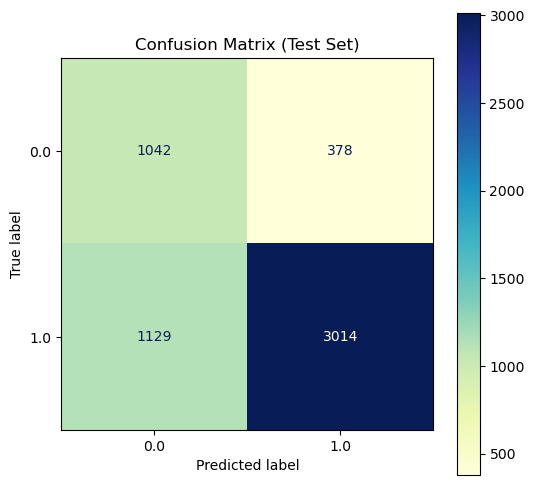

In [70]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
cm_display.plot(ax=ax, cmap='YlGnBu')
plt.title('Confusion Matrix (Test Set)')
plt.show()

The Confusion Matrix  provides a visual breakdown of the trade-off. True Negatives (TN) is 1042 (Correctly predicted 0.0). This number is high, reflecting the 73% Recall for class 0.0.True Positives (TP) is 3014 (Correctly predicted 1.0).False Negatives (FN) is 1129 (Predicted 0.0, but was actually 1.0). This high number of misses for the majority class explains the drop in Recall for class 1.0 (around 27%).False Positives (FP) is 378 (Predicted 1.0, but was actually 0.0). This relatively low number of Type I errors contributes to the high Precision for class 1.0. <br>
In summary, the use of class_weight='balanced' successfully re-calibrated the Logistic Regression model. It created a model with balanced recall across both classes (both are near 73%) at the cost of overall accuracy and minority-class precision. The resulting performance is a robust baseline for an imbalanced classification task, as the model demonstrates reasonable predictive ability for both outcomes. Let's now proceed with the next model. 

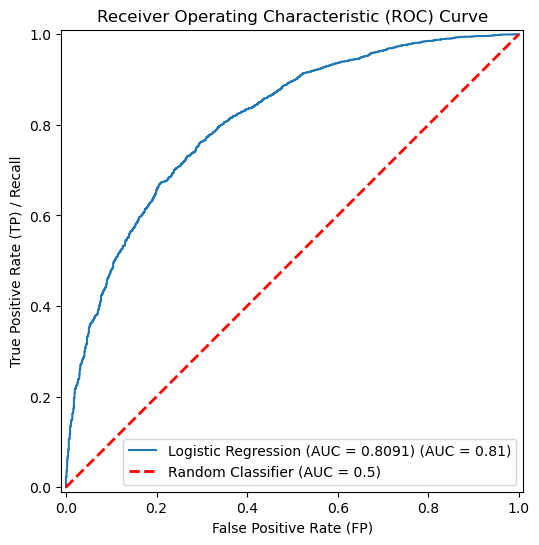

In [71]:
# AUC-ROC Curve 
# Calculate ROC curve metrics (False Positive Rate, True Positive Rate, Thresholds)
FP, TP, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(FP, TP)

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, ax=ax, name=f"Logistic Regression (AUC = {roc_auc:.4f})")
# Plot the baseline (random classifier)
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (FP)")
plt.ylabel("True Positive Rate (TP) / Recall")
plt.legend(loc="lower right")
plt.show()

### Resources

1. ESS11 2023 Data Protocol, Edition 1.2 February 2023 [https://smlouvy.gov.cz/smlouva/soubor/32846151/P01E%20ESS11%202023%20Data%20Protocol.pdf?backlink=0t05o] <br>
2. "Machine Learning 1: classification methods" course materials by Michał Woźniak. University of Warsaw, Faculty of Economic Science. <br>
3. "Machine Learning 2: predictive models, deep learning, neural network" course materials by Ewa Weychert. University of Warsaw, Faculty of Economic Science. <br> 
4. https://www.geeksforgeeks.org/machine-learning/
5. https://communities.sas.com/t5/SAS-Communities-Library/How-to-Avoid-Data-Leakage-When-Imputing-for-Predictive-Modeling/ta-p/911876 <br>
6. https://scikit-learn.org/stable/common_pitfalls.html <br>
7. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
8. https://www.datacamp.com/tutorial/understanding-logistic-regression-python <br>
